In [1]:
from matplotlib import pyplot as plt
import numpy as np

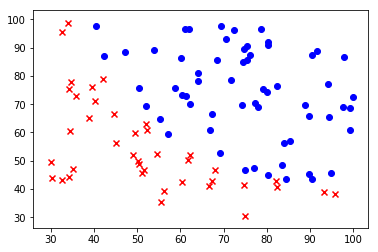

In [2]:
data = np.loadtxt('ex2data.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.show()

In [3]:
X_train = X[:70]
X_test = X[71:]
y_train = y[:70]
y_test = y[71:]

In [4]:
class Logistic_Regression:
    
    def __init__(self, X, y, initial_theta = [0,0,0]):
        self.X_train = np.concatenate((np.ones(len(X)).reshape(len(X),1), X), axis=1)
        self.y_train = y
        self.initial_theta = initial_theta
        
    def sigmoid_func(self, X):
        g = 1 / (1 + np.exp(-1 * X))  
        return g
    
    def cost_function(self, theta):
        X = self.X_train
        y = self.y_train
        m = len(X)
        cost = 0

        for i in range(len(X)):
            cost += y.T[i] * np.log(self.sigmoid_func(np.dot(X[i], theta))) + \
                (1-y).T[i] * np.log(1 - self.sigmoid_func(np.dot(X[i], theta)))
       
        cost /= (-1/m)
        
        return cost

    def minimize(self):
        from scipy.optimize import fmin
        self.theta = fmin(self.cost_function, self.initial_theta)
        return self.theta
    
    def prediction(self, X_test):
        X_test = np.concatenate((np.ones(len(X_test)).reshape(len(X_test),1), X_test), axis=1)
        theta = self.minimize()
        sigm_values = self.sigmoid_func(np.dot(X_test, theta))
        y_pred = [1 if sigm_values[k] >=0.5 else 0 for k in range(len(sigm_values))]
        return y_pred

In [5]:
model = Logistic_Regression(X_train, y_train)
y_pred = model.prediction(X_test)

Optimization terminated successfully.
         Current function value: 992.631235
         Iterations: 136
         Function evaluations: 252


In [6]:
theta = model.theta
theta

array([-24.58962828,   0.20660903,   0.1847495 ])

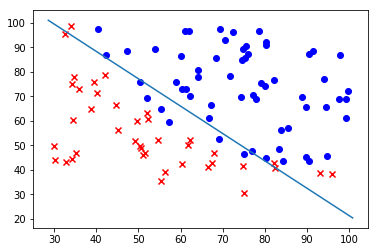

In [7]:
def plotDecisionsBoundary(theta, X, y):

    plot_x = [min(X[:,1])-2,  max(X[:,1])+2]
    alpha = (-1/theta[2])
    plot_y = [alpha*(theta[1]*plot_x[0] + theta[0]), alpha*(theta[1]*plot_x[1] + theta[0])] 
    plt.plot(plot_x, plot_y)

plotDecisionsBoundary(theta, X, y)
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.show()

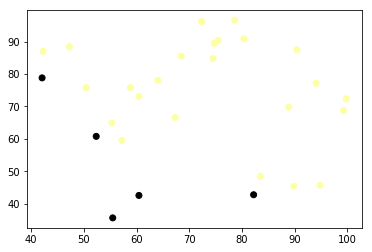

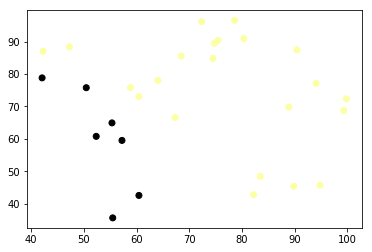

In [8]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='inferno')
plt.show()
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='inferno')
plt.show()